In [5]:
import pandas as pd

In [6]:
from wordcloud import WordCloud

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import *
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import roc_curve, auc

In [9]:
file_path = "C:\\Users\\agrim\\Python_Projects\\AI_Learning-Research\\Spam Classification\\SMSSpamCollection (1).txt"

df = pd.read_table(file_path, sep = '\t', header = None)

In [10]:
df = df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True)
df.head()

,0,1
0,ham,Msg me when rajini comes.
1,spam,Sunshine Hols. To claim ur med holiday send a ...
2,spam,Your free ringtone is waiting to be collected....
3,spam,Your B4U voucher w/c 27/03 is MARSMS. Log onto...
4,ham,Ok then i'll let him noe later n ask him call ...


In [11]:
df.rename(columns={0: 'label', 1:'sms_message'}, inplace=True)
df.head()

,label,sms_message
0,ham,Msg me when rajini comes.
1,spam,Sunshine Hols. To claim ur med holiday send a ...
2,spam,Your free ringtone is waiting to be collected....
3,spam,Your B4U voucher w/c 27/03 is MARSMS. Log onto...
4,ham,Ok then i'll let him noe later n ask him call ...


In [12]:
df['label'] = df['label'].replace('ham',0)
df['label'] = df['label'].replace('spam',1)
df.head()

,label,sms_message
0,0,Msg me when rajini comes.
1,1,Sunshine Hols. To claim ur med holiday send a ...
2,1,Your free ringtone is waiting to be collected....
3,1,Your B4U voucher w/c 27/03 is MARSMS. Log onto...
4,0,Ok then i'll let him noe later n ask him call ...


In [13]:
X_train_sms, X_test_sms, Y_train, Y_test = train_test_split(df['sms_message'], df['label'], random_state =42)

X_train_sms.head()

4281    A boy was late 2 home. His father: "POWER OF F...
585     How's my loverboy doing ? What does he do that...
4545    It doesnt make sense to take it there unless i...
3034              Have you laid your airtel line to rest?
2758                  Thats cool. I want to please you...
Name: sms_message, dtype: object

In [14]:
count_vector = CountVectorizer(ngram_range = (1,1), lowercase = True, stop_words = 'english')

In [15]:
X_train = count_vector.fit_transform(X_train_sms).toarray()
X_test = count_vector.transform(X_test_sms).toarray()

In [16]:
X_train_feature_list = count_vector.get_feature_names_out()
print(X_train_feature_list)

['00' '000' '008704050406' ... 'èn' 'ú1' '〨ud']


In [17]:
frequencey_matrix_X_train = pd.DataFrame(X_train, columns = X_train_feature_list)
frequencey_matrix_X_train.head()

,00,000,008704050406,0121,01223585236,01223585334,0125698789,02,0207,02072069400,...,zeros,zhong,zindgi,zoe,zogtorius,zouk,zyada,èn,ú1,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
MNB = MultinomialNB()
MNB.fit(X_train,Y_train)

MultinomialNB()

In [19]:
predictions = MNB.predict(X_test)

In [20]:
accuracy_score(predictions,Y_test)

0.9863603732950467

In [21]:
precision_score(predictions, Y_test)

0.9269662921348315

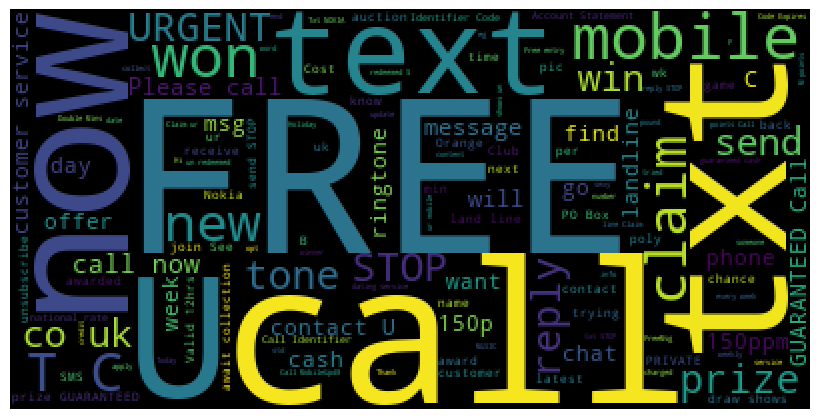

In [22]:
spam_words = ' '.join(X_train_sms[Y_train == 1])
wordcloud = WordCloud( max_words=150).generate(spam_words)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

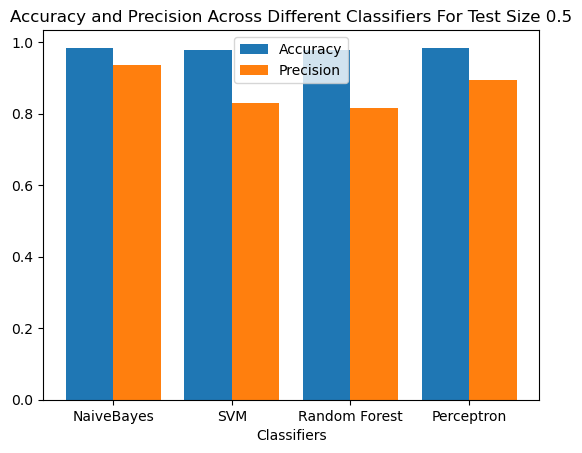

In [23]:
SVM = SVC(kernel = 'rbf', probability = True)
RF = RandomForestClassifier()
P = Perceptron(random_state = 42)


X_train_sms, X_test_sms, Y_train, Y_test = train_test_split(df['sms_message'], df['label'], test_size = 0.5, random_state =42)
X_train = count_vector.fit_transform(X_train_sms).toarray()
X_test = count_vector.transform(X_test_sms).toarray()
MNB.fit(X_train,Y_train)
SVM.fit(X_train, Y_train)
RF.fit(X_train, Y_train)
P.fit(X_train,Y_train)

NB_accuracy = accuracy_score(MNB.predict(X_test), Y_test)
NB_precision = precision_score(MNB.predict(X_test), Y_test)
SVM_accuracy= accuracy_score(SVM.predict(X_test), Y_test)
SVM_precision = precision_score(SVM.predict(X_test), Y_test)
Random_Forest_accuracy =accuracy_score(RF.predict(X_test), Y_test)
Random_Forest_precision = precision_score(RF.predict(X_test), Y_test)
P_accuracy =accuracy_score(P.predict(X_test), Y_test)
P_precision = precision_score(P.predict(X_test), Y_test)

  
X = ['NaiveBayes', 'SVM', 'Random Forest', 'Perceptron']
Yaccuracy = [NB_accuracy, SVM_accuracy, Random_Forest_accuracy, P_accuracy]
Zprecision = [NB_precision, SVM_precision, Random_Forest_precision, P_precision]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Yaccuracy, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, Zprecision, 0.4, label = 'Precision')

  
plt.xticks(X_axis, X)
plt.xlabel("Classifiers")

plt.title("Accuracy and Precision Across Different Classifiers For Test Size 0.5")
plt.legend()
plt.show()


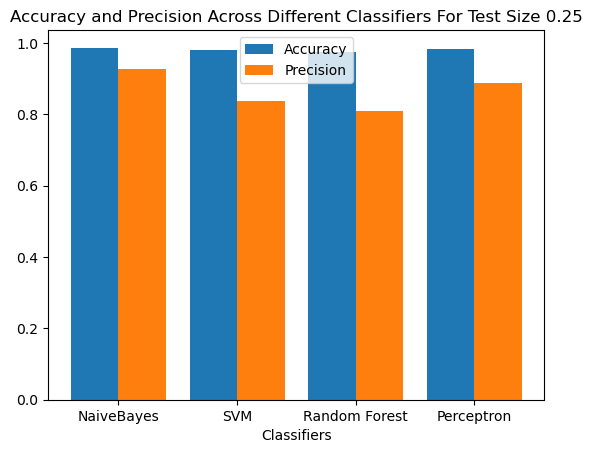

In [24]:
X_train_sms, X_test_sms, Y_train, Y_test = train_test_split(df['sms_message'], df['label'], test_size = 0.25, random_state =42)
X_train = count_vector.fit_transform(X_train_sms).toarray()
X_test = count_vector.transform(X_test_sms).toarray()
MNB.fit(X_train,Y_train)
SVM.fit(X_train, Y_train)
RF.fit(X_train, Y_train)
P.fit(X_train,Y_train)


NB_accuracy = accuracy_score(MNB.predict(X_test), Y_test)
NB_precision = precision_score(MNB.predict(X_test), Y_test)
SVM_accuracy= accuracy_score(SVM.predict(X_test), Y_test)
SVM_precision = precision_score(SVM.predict(X_test), Y_test)
Random_Forest_accuracy =accuracy_score(RF.predict(X_test), Y_test)
Random_Forest_precision = precision_score(RF.predict(X_test), Y_test)
P_accuracy =accuracy_score(P.predict(X_test), Y_test)
P_precision = precision_score(P.predict(X_test), Y_test)


X = ['NaiveBayes', 'SVM', 'Random Forest', 'Perceptron']
Yaccuracy = [NB_accuracy, SVM_accuracy, Random_Forest_accuracy, P_accuracy]
Zprecision = [NB_precision, SVM_precision, Random_Forest_precision, P_precision]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Yaccuracy, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, Zprecision, 0.4, label = 'Precision')

  
plt.xticks(X_axis, X)
plt.xlabel("Classifiers")

plt.title("Accuracy and Precision Across Different Classifiers For Test Size 0.25")
plt.legend()
plt.show()

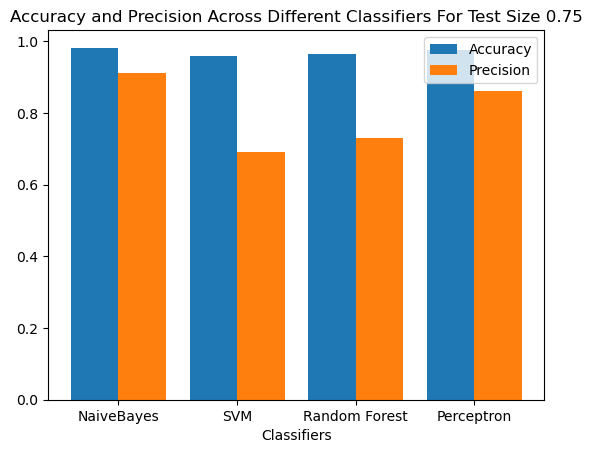

In [25]:
X_train_sms, X_test_sms, Y_train, Y_test = train_test_split(df['sms_message'], df['label'], test_size = 0.75, random_state =42)
X_train = count_vector.fit_transform(X_train_sms).toarray()
X_test = count_vector.transform(X_test_sms).toarray()
MNB.fit(X_train,Y_train)
SVM.fit(X_train, Y_train)
RF.fit(X_train, Y_train)
P.fit(X_train,Y_train)


NB_accuracy = accuracy_score(MNB.predict(X_test), Y_test)
NB_precision = precision_score(MNB.predict(X_test), Y_test)
SVM_accuracy= accuracy_score(SVM.predict(X_test), Y_test)
SVM_precision = precision_score(SVM.predict(X_test), Y_test)
Random_Forest_accuracy =accuracy_score(RF.predict(X_test), Y_test)
Random_Forest_precision = precision_score(RF.predict(X_test), Y_test)
P_accuracy =accuracy_score(P.predict(X_test), Y_test)
P_precision = precision_score(P.predict(X_test), Y_test)


X = ['NaiveBayes', 'SVM', 'Random Forest', 'Perceptron']
Yaccuracy = [NB_accuracy, SVM_accuracy, Random_Forest_accuracy, P_accuracy]
Zprecision = [NB_precision, SVM_precision, Random_Forest_precision, P_precision]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Yaccuracy, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, Zprecision, 0.4, label = 'Precision')

  
plt.xticks(X_axis, X)
plt.xlabel("Classifiers")

plt.title("Accuracy and Precision Across Different Classifiers For Test Size 0.75")
plt.legend()
plt.show()

In [26]:
X = count_vector.fit_transform(df['sms_message'])
Y = df['label']


In [27]:
kf = KFold(n_splits = 5)

Fold 0


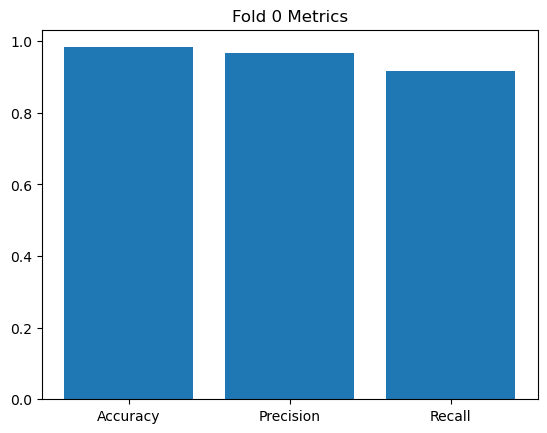

 Accuracy: 0.9829596412556054
 Precision: 0.9683544303797469


Fold 1


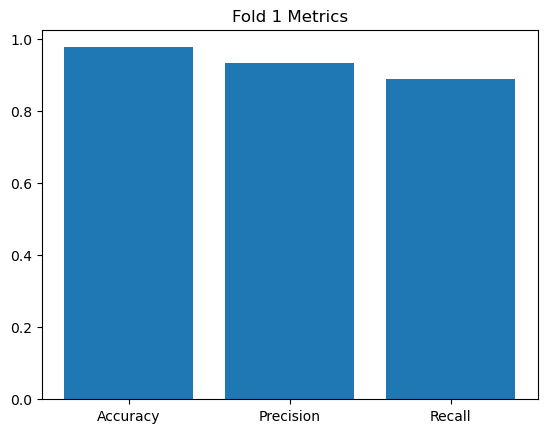

 Accuracy: 0.9775784753363229
 Precision: 0.9347826086956522


Fold 2


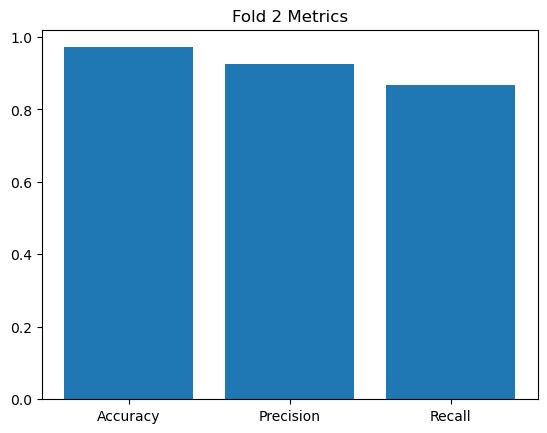

 Accuracy: 0.9712746858168761
 Precision: 0.9261744966442953


Fold 3


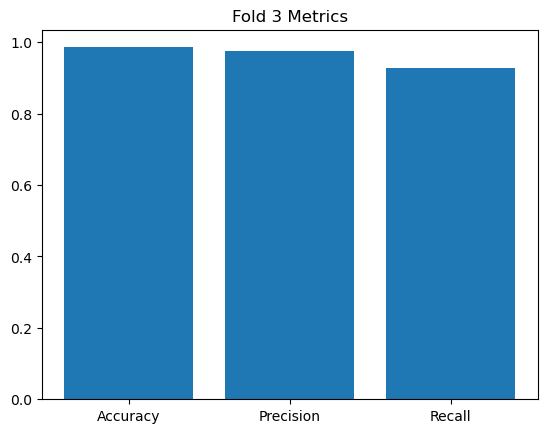

 Accuracy: 0.9856373429084381
 Precision: 0.9743589743589743


Fold 4


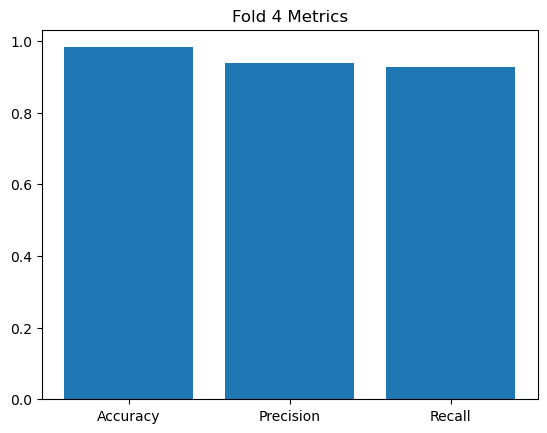

 Accuracy: 0.9820466786355476
 Precision: 0.9383561643835616


 Mean Accuracy: 0.9798993647905581
 Mean Precision: 0.948405334892446
 Mean Recall: 0.9052504618709395


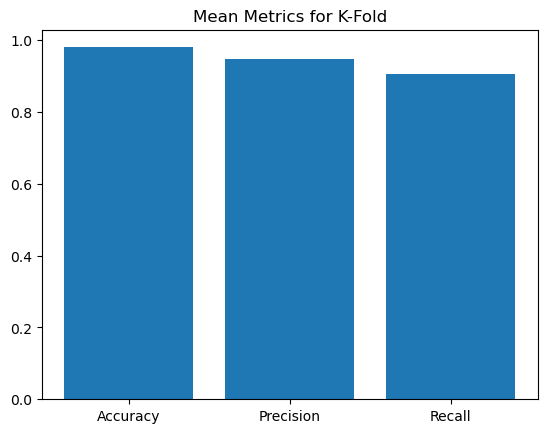

In [28]:
accuracy_list = []
precision_list = []
recall_list = []

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}")

    
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    MNB.fit(X_train,Y_train)
    KFPredict = MNB.predict(X_test)
    
    accuracy = accuracy_score(KFPredict,Y_test)
    precision = precision_score(KFPredict,Y_test)
    recall = recall_score(KFPredict, Y_test)
    
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    
    labels = ['Accuracy', 'Precision', 'Recall']
    counts = [accuracy, precision, recall]
    plt.bar(labels, counts)
    plt.title(f"Fold {i} Metrics")
    plt.show()
    
    
    print(f" Accuracy: {accuracy}")
    print(f" Precision: {precision}")
    print("\n")
    

mean_accuracy = mean(accuracy_list)
mean_precision = mean(precision_list)
mean_recall = mean(recall_list)
print(f" Mean Accuracy: {mean_accuracy}")
print(f" Mean Precision: {mean_precision}")
print(f" Mean Recall: {mean_recall}")

means = [mean_accuracy,mean_precision,mean_recall]

plt.bar(['Accuracy','Precision','Recall'],means)
plt.title("Mean Metrics for K-Fold")
plt.show()


Fold 0


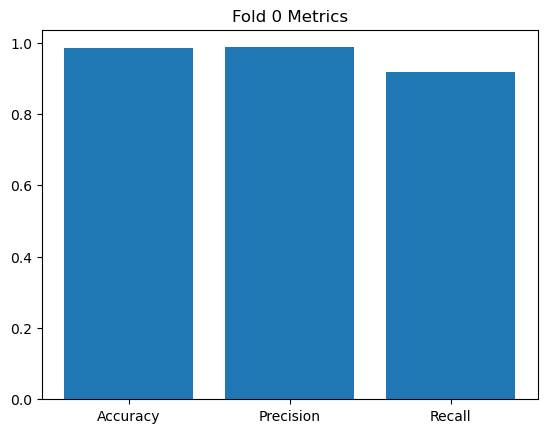

 Accuracy: 0.985663082437276
 Precision: 0.9871794871794872


Fold 1


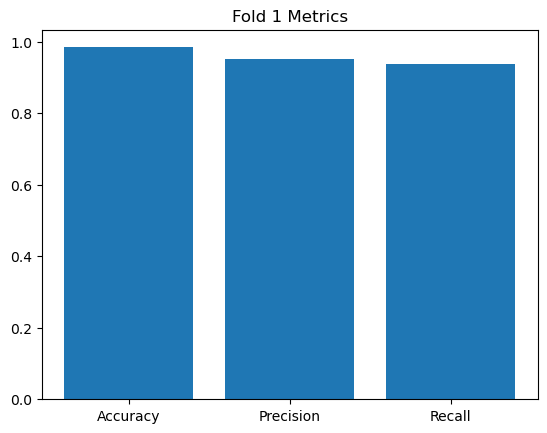

 Accuracy: 0.9838709677419355
 Precision: 0.95


Fold 2


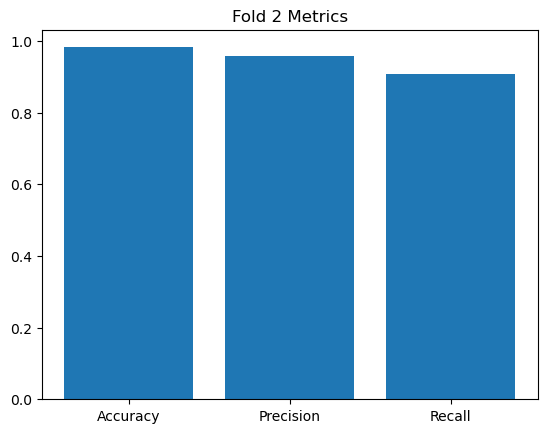

 Accuracy: 0.9820466786355476
 Precision: 0.9583333333333334


Fold 3


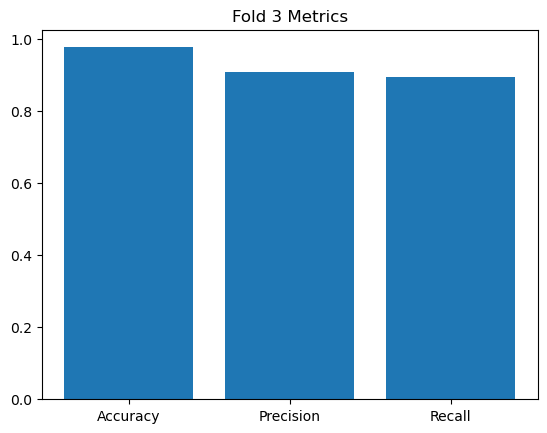

 Accuracy: 0.9766606822262118
 Precision: 0.9090909090909091


Fold 4


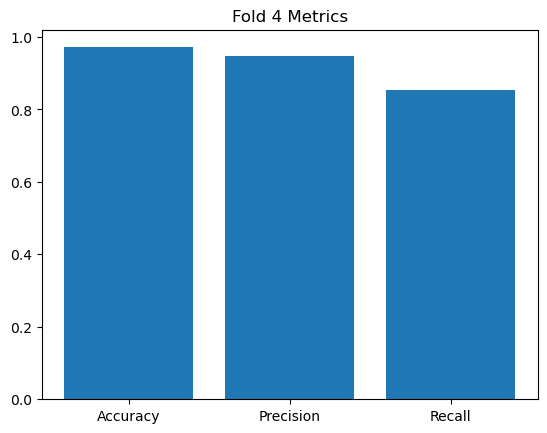

 Accuracy: 0.9712746858168761
 Precision: 0.9459459459459459


Fold 5


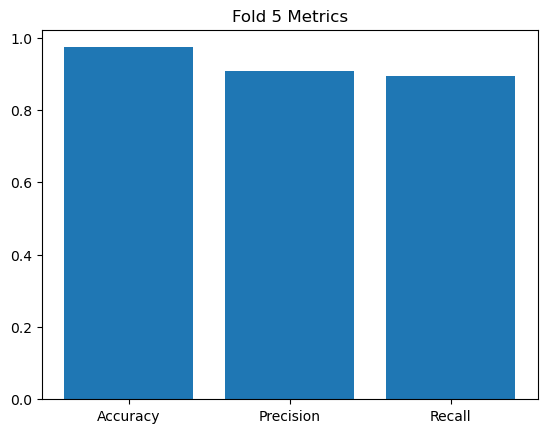

 Accuracy: 0.9730700179533214
 Precision: 0.9066666666666666


Fold 6


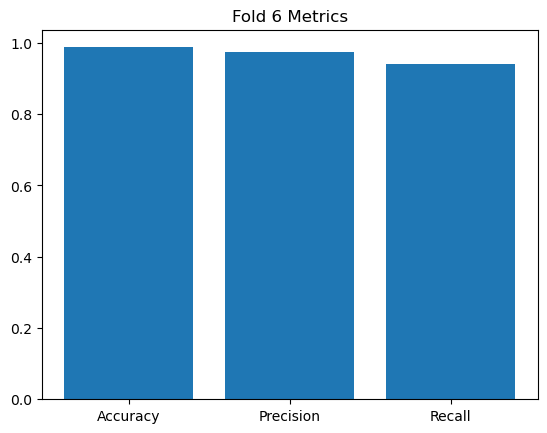

 Accuracy: 0.9874326750448833
 Precision: 0.975


Fold 7


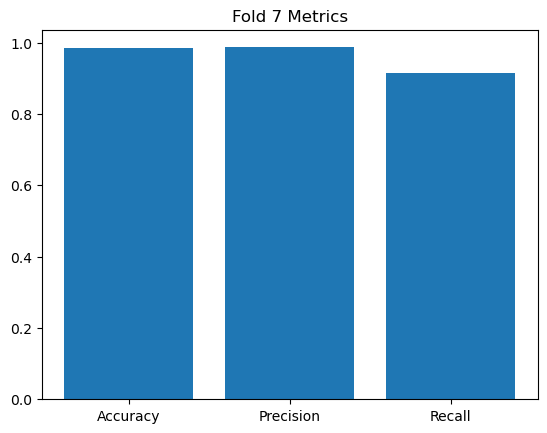

 Accuracy: 0.9856373429084381
 Precision: 0.9868421052631579


Fold 8


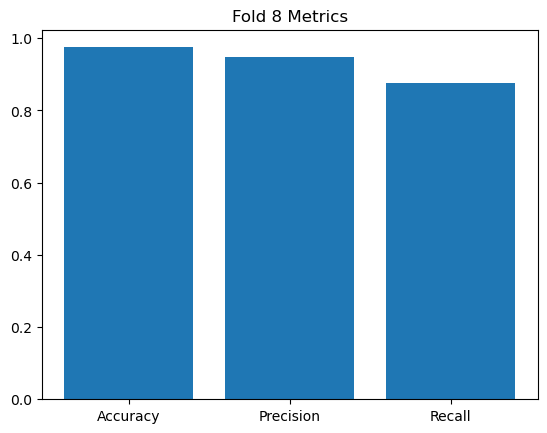

 Accuracy: 0.9748653500897666
 Precision: 0.9466666666666667


Fold 9


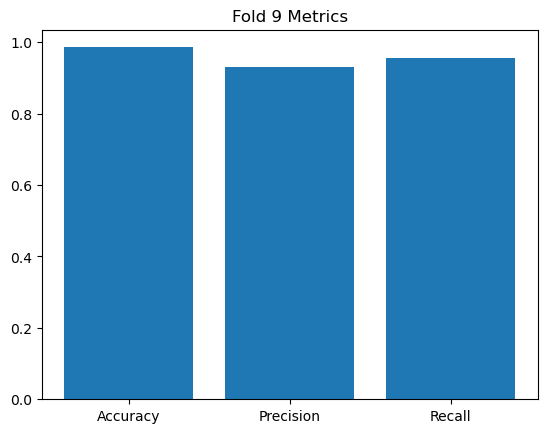

 Accuracy: 0.9856373429084381
 Precision: 0.9295774647887324


 Mean Accuracy: 0.9806158825762694
 Mean Precision: 0.9495302578934899
 Mean Recall: 0.9080307477363394


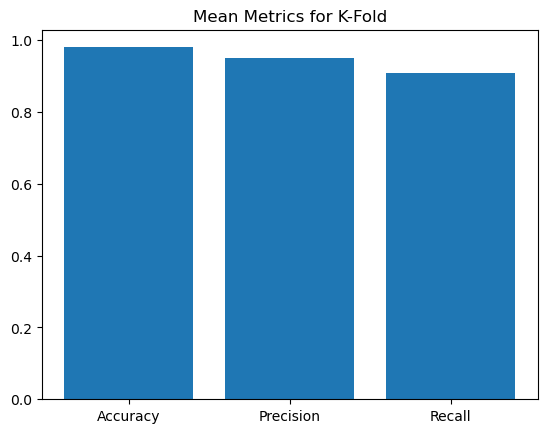

In [29]:
kf = KFold(n_splits = 10)


accuracy_list = []
precision_list = []

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}")

    
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    MNB.fit(X_train,Y_train)
    KFPredict = MNB.predict(X_test)
    
    accuracy = accuracy_score(KFPredict,Y_test)
    precision = precision_score(KFPredict,Y_test)
    recall = recall_score(KFPredict, Y_test)
    
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    
    labels = ['Accuracy', 'Precision', 'Recall']
    counts = [accuracy, precision, recall]
    plt.bar(labels, counts)
    plt.title(f"Fold {i} Metrics")
    plt.show()
    
    
    print(f" Accuracy: {accuracy}")
    print(f" Precision: {precision}")
    print("\n")
    

mean_accuracy = mean(accuracy_list)
mean_precision = mean(precision_list)
mean_recall = mean(recall_list)
print(f" Mean Accuracy: {mean_accuracy}")
print(f" Mean Precision: {mean_precision}")
print(f" Mean Recall: {mean_recall}")

means = [mean_accuracy,mean_precision,mean_recall]

plt.bar(['Accuracy','Precision','Recall'],means)
plt.title("Mean Metrics for K-Fold")
plt.show()

Fold 0


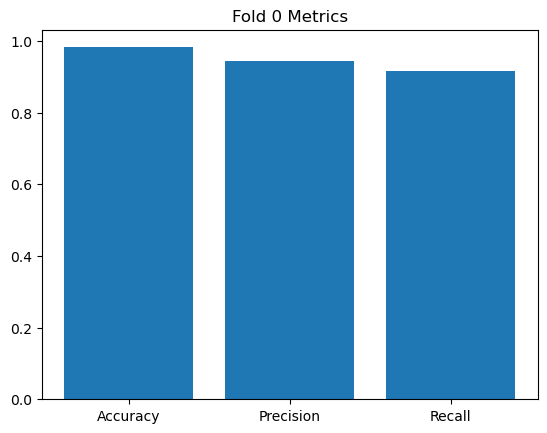

 Accuracy: 0.9820627802690582
 Precision: 0.9432624113475178


Fold 1


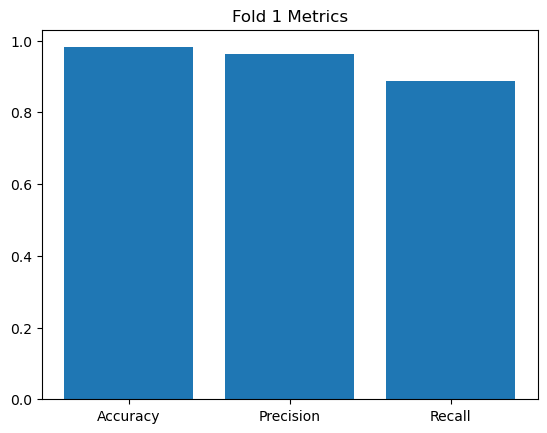

 Accuracy: 0.9811659192825112
 Precision: 0.9621212121212122


Fold 2


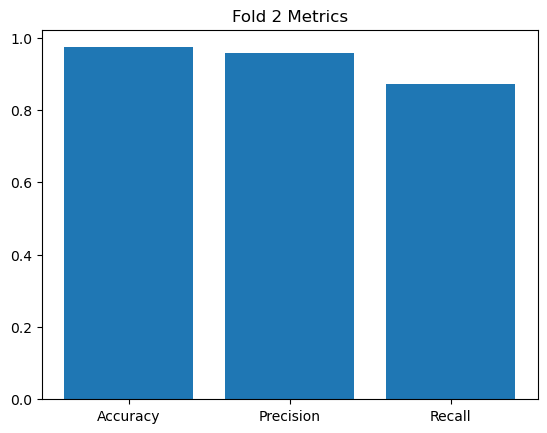

 Accuracy: 0.9730700179533214
 Precision: 0.9567901234567902


Fold 3


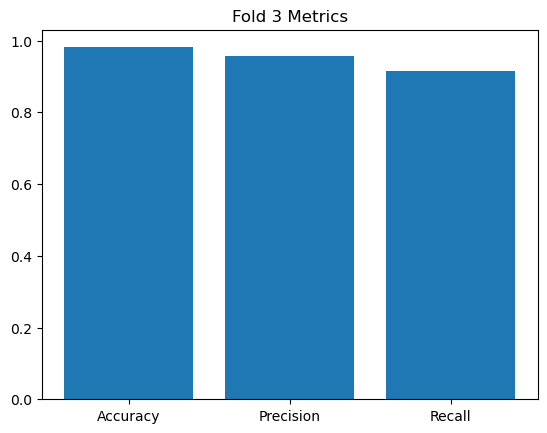

 Accuracy: 0.981149012567325
 Precision: 0.9559748427672956


Fold 4


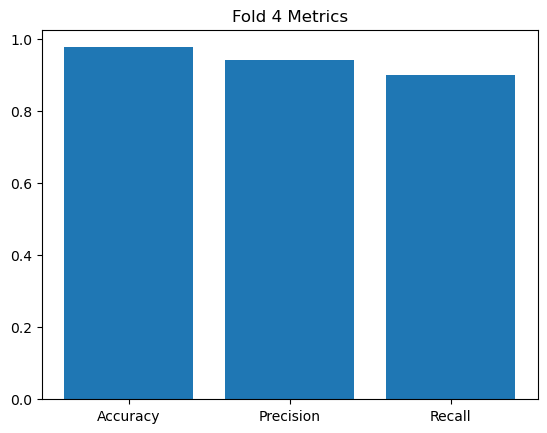

 Accuracy: 0.9775583482944344
 Precision: 0.9411764705882353


 Mean Accuracy: 0.9790012156733301
 Mean Precision: 0.9518650120562102
 Mean Recall: 0.9056131825461833


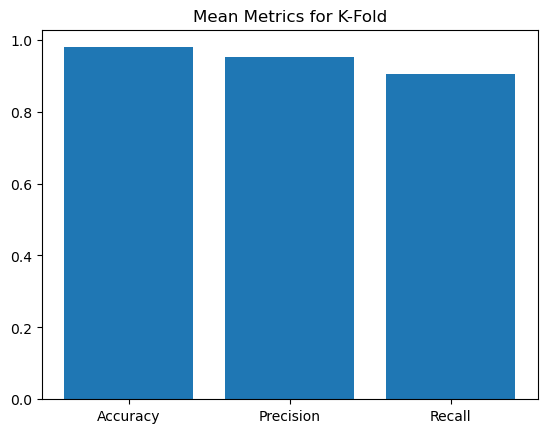

In [30]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)


accuracy_list = []
precision_list = []

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}")

    
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    MNB.fit(X_train,Y_train)
    KFPredict = MNB.predict(X_test)
    
    accuracy = accuracy_score(KFPredict,Y_test)
    precision = precision_score(KFPredict,Y_test)
    recall = recall_score(KFPredict, Y_test)
    
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    
    labels = ['Accuracy', 'Precision', 'Recall']
    counts = [accuracy, precision, recall]
    plt.bar(labels, counts)
    plt.title(f"Fold {i} Metrics")
    plt.show()
    
    
    print(f" Accuracy: {accuracy}")
    print(f" Precision: {precision}")
    print("\n")
    
   

mean_accuracy = mean(accuracy_list)
mean_precision = mean(precision_list)
mean_recall = mean(recall_list)
print(f" Mean Accuracy: {mean_accuracy}")
print(f" Mean Precision: {mean_precision}")
print(f" Mean Recall: {mean_recall}")

means = [mean_accuracy,mean_precision,mean_recall]

plt.bar(['Accuracy','Precision','Recall'],means)
plt.title("Mean Metrics for K-Fold")
plt.show()

Fold 0


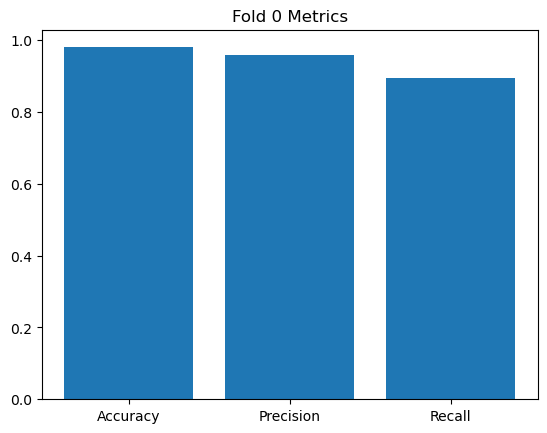

 Accuracy: 0.9802867383512545
 Precision: 0.9577464788732394


Fold 1


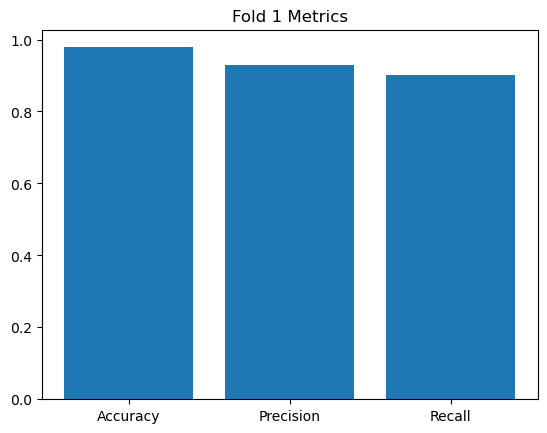

 Accuracy: 0.978494623655914
 Precision: 0.9285714285714286


Fold 2


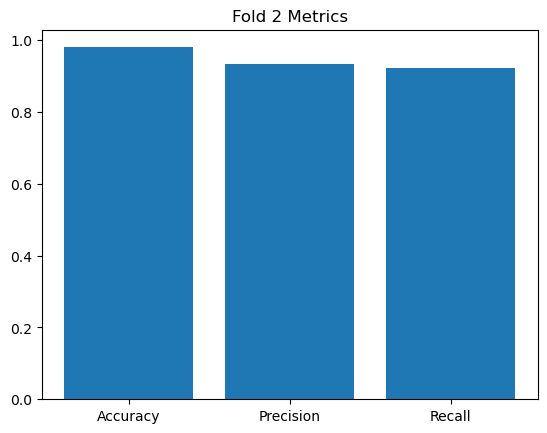

 Accuracy: 0.9802513464991023
 Precision: 0.935064935064935


Fold 3


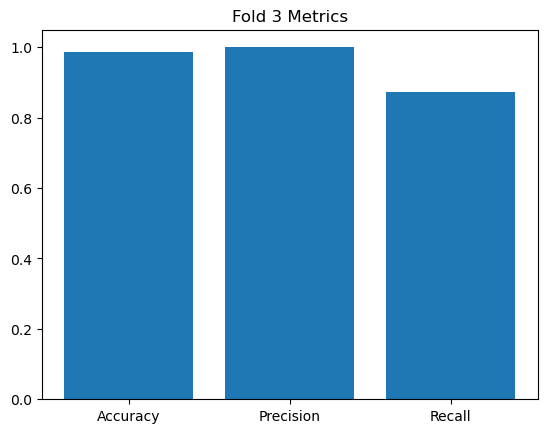

 Accuracy: 0.9856373429084381
 Precision: 1.0


Fold 4


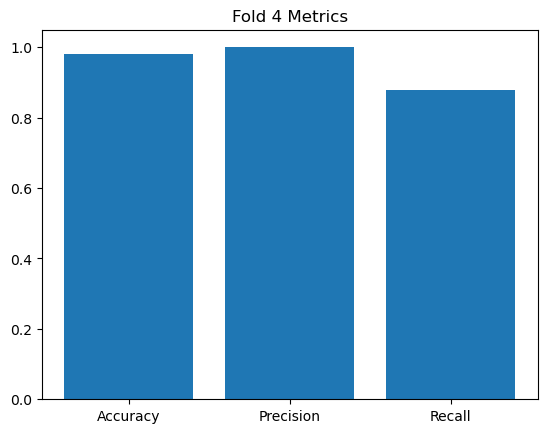

 Accuracy: 0.9820466786355476
 Precision: 1.0


Fold 5


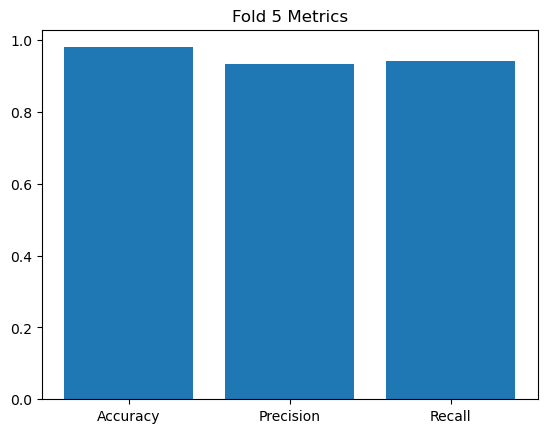

 Accuracy: 0.9802513464991023
 Precision: 0.9325842696629213


Fold 6


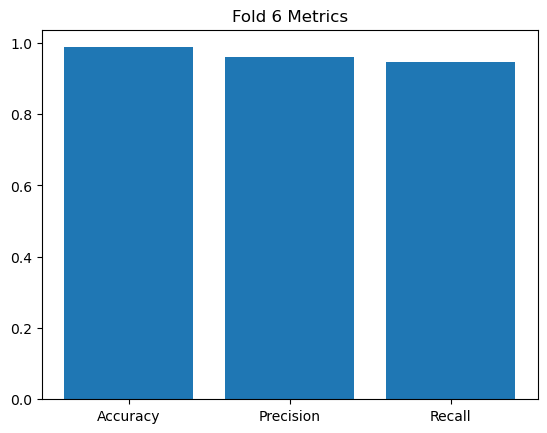

 Accuracy: 0.9874326750448833
 Precision: 0.958904109589041


Fold 7


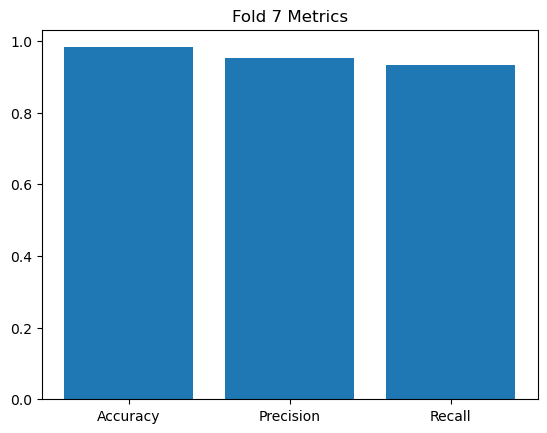

 Accuracy: 0.9820466786355476
 Precision: 0.9534883720930233


Fold 8


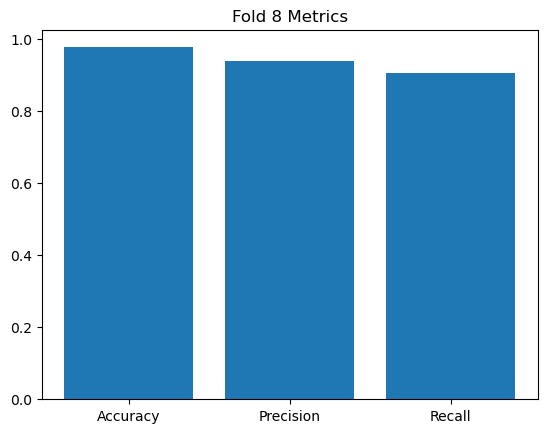

 Accuracy: 0.9766606822262118
 Precision: 0.9390243902439024


Fold 9


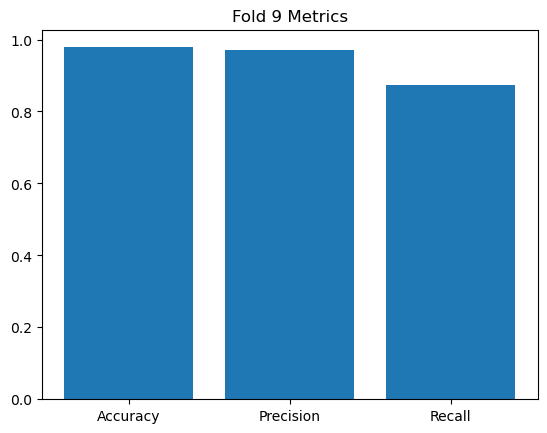

 Accuracy: 0.9784560143626571
 Precision: 0.971830985915493


 Mean Accuracy: 0.9811564126818658
 Mean Precision: 0.9577214970013984
 Mean Recall: 0.906187838653159


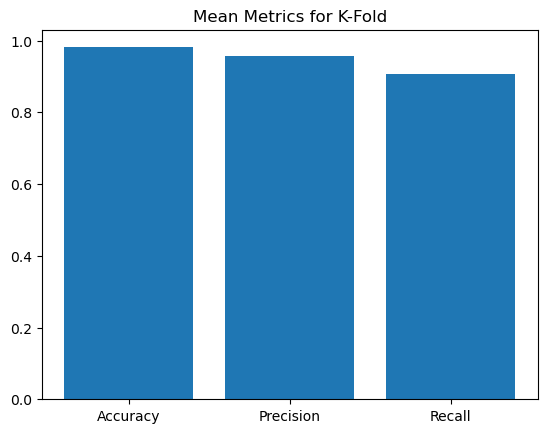

In [31]:
kf = KFold(n_splits = 10, shuffle = True, random_state = 42)


accuracy_list = []
precision_list = []

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}")
    
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    MNB.fit(X_train,Y_train)
    KFPredict = MNB.predict(X_test)
    
    accuracy = accuracy_score(KFPredict,Y_test)
    precision = precision_score(KFPredict,Y_test)
    recall = recall_score(KFPredict, Y_test)
    
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    
    labels = ['Accuracy', 'Precision', 'Recall']
    counts = [accuracy, precision, recall]
    plt.bar(labels, counts)
    plt.title(f"Fold {i} Metrics")
    plt.show()
    
    
    print(f" Accuracy: {accuracy}")
    print(f" Precision: {precision}")
    print("\n")
    
 

mean_accuracy = mean(accuracy_list)
mean_precision = mean(precision_list)
mean_recall = mean(recall_list)
print(f" Mean Accuracy: {mean_accuracy}")
print(f" Mean Precision: {mean_precision}")
print(f" Mean Recall: {mean_recall}")

means = [mean_accuracy,mean_precision,mean_recall]

plt.bar(['Accuracy','Precision','Recall'],means)
plt.title("Mean Metrics for K-Fold")
plt.show()

In [32]:
imbalanced_file_path = "C:\\Users\\agrim\\Python_Projects\\AI_Learning-Research\\Spam Classification\\imbalanced_spam.csv"
df3 = pd.read_csv(imbalanced_file_path, encoding='latin-1')


df3 = df3.reindex(np.random.permutation(df3.index))
df3.reset_index(inplace=True, drop=True)
df3.head()

,label,email,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Also sir, i sent you an email about how to log...",NaN,NaN,NaN
1,ham,Yes ammae....life takes lot of turns you can o...,NaN,NaN,NaN
2,ham,alright. Thanks for the advice. Enjoy your nig...,NaN,NaN,NaN
3,spam,U have won a nokia 6230 plus a free digital ca...,NaN,NaN,NaN
4,ham,I am in office:)whats the matter..msg me now.i...,NaN,NaN,NaN


In [33]:
df3['label'] = df3['label'].replace('ham',0)
df3['label'] = df3['label'].replace('spam',1)
df3.head()

,label,email,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Also sir, i sent you an email about how to log...",NaN,NaN,NaN
1,0,Yes ammae....life takes lot of turns you can o...,NaN,NaN,NaN
2,0,alright. Thanks for the advice. Enjoy your nig...,NaN,NaN,NaN
3,1,U have won a nokia 6230 plus a free digital ca...,NaN,NaN,NaN
4,0,I am in office:)whats the matter..msg me now.i...,NaN,NaN,NaN


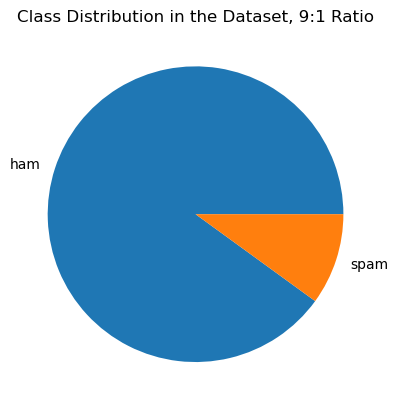

In [34]:
class_labels = ['ham','spam']
class_counts = [4500,500]
bar_colors = ['red','blue']
plt.pie(class_counts,labels = class_labels)
plt.title('Class Distribution in the Dataset, 9:1 Ratio')



plt.show()

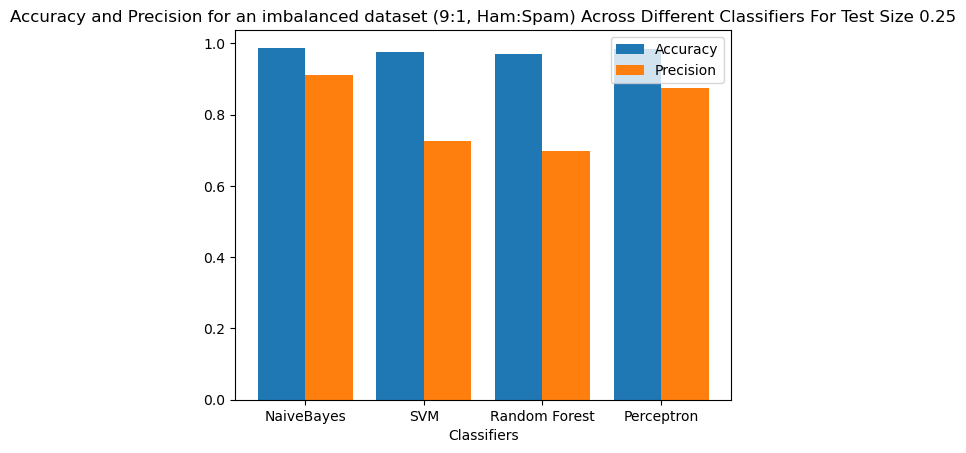

In [35]:
X_train_sms, X_test_sms, Y_train, Y_test = train_test_split(df3['email'], df3['label'], test_size = 0.25, random_state =42)
X_train = count_vector.fit_transform(X_train_sms).toarray()
X_test = count_vector.transform(X_test_sms).toarray()
MNB.fit(X_train,Y_train)
SVM.fit(X_train, Y_train)
RF.fit(X_train, Y_train)
P.fit(X_train,Y_train)

MNBPredict = MNB.predict(X_test)
SVMPredict = SVM.predict(X_test)
RFPredict = RF.predict(X_test) 
PPredict = P.predict(X_test)

y_score = [MNB.predict_proba(X_test)[:,1], SVM.predict_proba(X_test)[:,1], RF.predict_proba(X_test)[:,1], P.decision_function(X_test)]
Classifiers = ['Multinomial Naive Bayes', 'Support Vector Machine', 'Random Forest', 'Perceptron']


NB_accuracy = accuracy_score(MNBPredict, Y_test)
NB_precision = precision_score(MNBPredict, Y_test)
SVM_accuracy= accuracy_score(SVMPredict, Y_test)
SVM_precision = precision_score(SVMPredict, Y_test)
Random_Forest_accuracy =accuracy_score(RFPredict, Y_test)
Random_Forest_precision = precision_score(RFPredict, Y_test)
P_accuracy =accuracy_score(PPredict, Y_test)
P_precision = precision_score(PPredict, Y_test)


X = ['NaiveBayes', 'SVM', 'Random Forest', 'Perceptron']
Yaccuracy = [NB_accuracy, SVM_accuracy, Random_Forest_accuracy, P_accuracy]
Zprecision = [NB_precision, SVM_precision, Random_Forest_precision, P_precision]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Yaccuracy, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, Zprecision, 0.4, label = 'Precision')

  
plt.xticks(X_axis, X)
plt.xlabel("Classifiers")

plt.title("Accuracy and Precision for an imbalanced dataset (9:1, Ham:Spam) Across Different Classifiers For Test Size 0.25")
plt.legend()
plt.show()

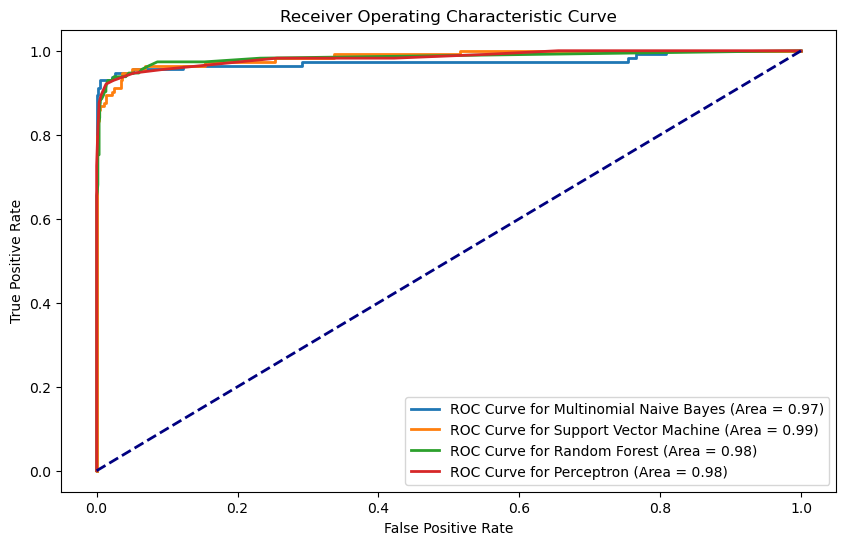

In [37]:
plt.figure(figsize=(10, 6))
for score, classifier in zip(y_score, Classifiers):
    fpr, tpr, _ = roc_curve(Y_test, score)  
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC Curve for %s (Area = %0.2f)' % (classifier, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for an imbalanced dataset (9:1, Ham:Spam) Test Size = 0.25')
plt.legend(loc='lower right')
plt.show()

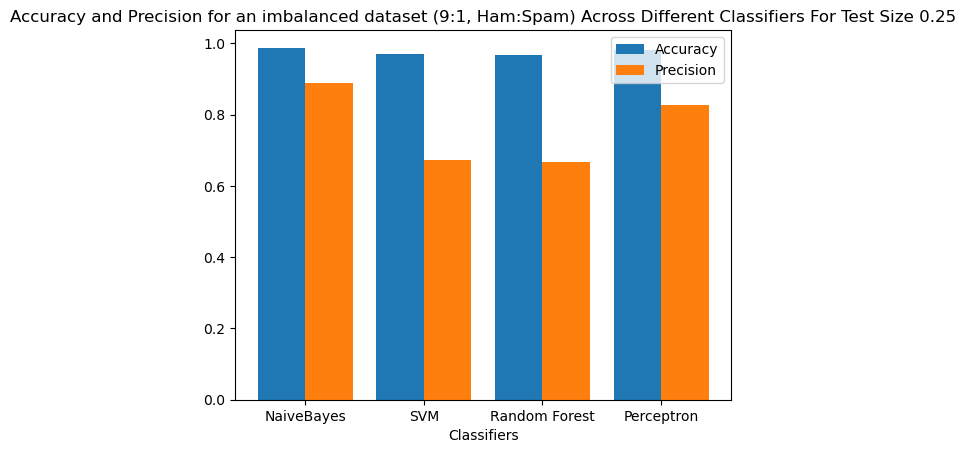

In [38]:
X_train_sms, X_test_sms, Y_train, Y_test = train_test_split(df3['email'], df3['label'], test_size = 0.5, random_state =42)
X_train = count_vector.fit_transform(X_train_sms).toarray()
X_test = count_vector.transform(X_test_sms).toarray()
MNB.fit(X_train,Y_train)
SVM.fit(X_train, Y_train)
RF.fit(X_train, Y_train)
P.fit(X_train,Y_train)

MNBPredict = MNB.predict(X_test)
SVMPredict = SVM.predict(X_test)
RFPredict = RF.predict(X_test) 
PPredict = P.predict(X_test)

y_score = [MNB.predict_proba(X_test)[:,1], SVM.predict_proba(X_test)[:,1], RF.predict_proba(X_test)[:,1], P.decision_function(X_test)]
Classifiers = ['Multinomial Naive Bayes', 'Support Vector Machine', 'Random Forest', 'Perceptron']


NB_accuracy = accuracy_score(MNBPredict, Y_test)
NB_precision = precision_score(MNBPredict, Y_test)
SVM_accuracy= accuracy_score(SVMPredict, Y_test)
SVM_precision = precision_score(SVMPredict, Y_test)
Random_Forest_accuracy =accuracy_score(RFPredict, Y_test)
Random_Forest_precision = precision_score(RFPredict, Y_test)
P_accuracy =accuracy_score(PPredict, Y_test)
P_precision = precision_score(PPredict, Y_test)


X = ['NaiveBayes', 'SVM', 'Random Forest', 'Perceptron']
Yaccuracy = [NB_accuracy, SVM_accuracy, Random_Forest_accuracy, P_accuracy]
Zprecision = [NB_precision, SVM_precision, Random_Forest_precision, P_precision]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Yaccuracy, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, Zprecision, 0.4, label = 'Precision')

  
plt.xticks(X_axis, X)
plt.xlabel("Classifiers")

plt.title("Accuracy and Precision for an imbalanced dataset (9:1, Ham:Spam) Across Different Classifiers For Test Size 0.5")
plt.legend()
plt.show()

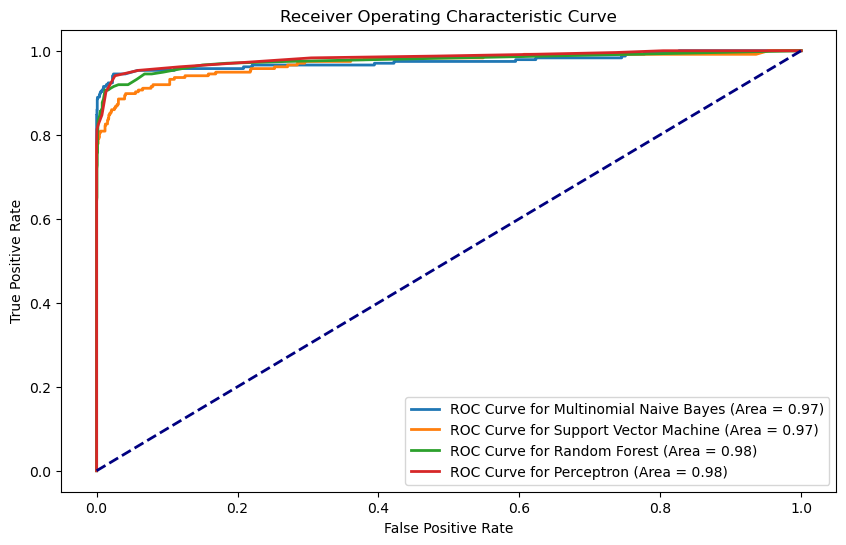

In [39]:
plt.figure(figsize=(10, 6))
for score, classifier in zip(y_score, Classifiers):
    fpr, tpr, _ = roc_curve(Y_test, score)  
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC Curve for %s (Area = %0.2f)' % (classifier, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for an imbalanced dataset (9:1, Ham:Spam) Test Size = 0.5')
plt.legend(loc='lower right')
plt.show()

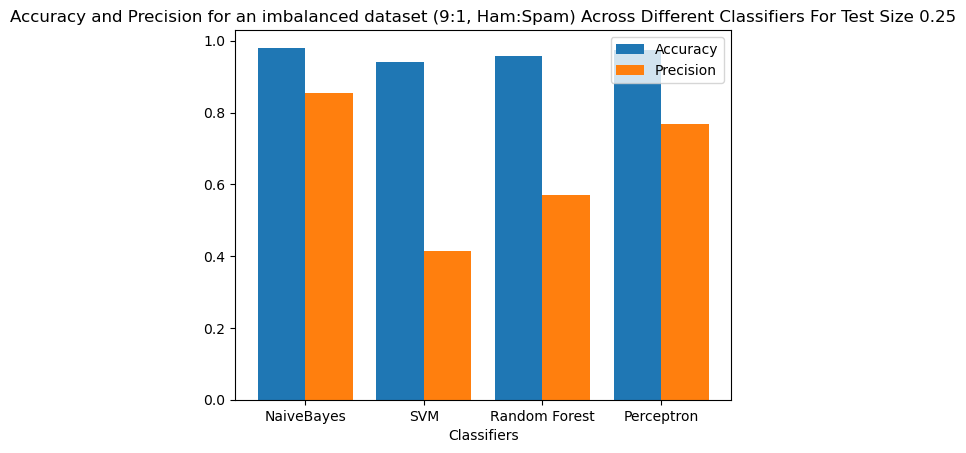

In [40]:
X_train_sms, X_test_sms, Y_train, Y_test = train_test_split(df3['email'], df3['label'], test_size = 0.75, random_state =42)
X_train = count_vector.fit_transform(X_train_sms).toarray()
X_test = count_vector.transform(X_test_sms).toarray()
MNB.fit(X_train,Y_train)
SVM.fit(X_train, Y_train)
RF.fit(X_train, Y_train)
P.fit(X_train,Y_train)

MNBPredict = MNB.predict(X_test)
SVMPredict = SVM.predict(X_test)
RFPredict = RF.predict(X_test) 
PPredict = P.predict(X_test)

y_score = [MNB.predict_proba(X_test)[:,1], SVM.predict_proba(X_test)[:,1], RF.predict_proba(X_test)[:,1], P.decision_function(X_test)]
Classifiers = ['Multinomial Naive Bayes', 'Support Vector Machine', 'Random Forest', 'Perceptron']


NB_accuracy = accuracy_score(MNBPredict, Y_test)
NB_precision = precision_score(MNBPredict, Y_test)
SVM_accuracy= accuracy_score(SVMPredict, Y_test)
SVM_precision = precision_score(SVMPredict, Y_test)
Random_Forest_accuracy =accuracy_score(RFPredict, Y_test)
Random_Forest_precision = precision_score(RFPredict, Y_test)
P_accuracy =accuracy_score(PPredict, Y_test)
P_precision = precision_score(PPredict, Y_test)


X = ['NaiveBayes', 'SVM', 'Random Forest', 'Perceptron']
Yaccuracy = [NB_accuracy, SVM_accuracy, Random_Forest_accuracy, P_accuracy]
Zprecision = [NB_precision, SVM_precision, Random_Forest_precision, P_precision]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Yaccuracy, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, Zprecision, 0.4, label = 'Precision')

  
plt.xticks(X_axis, X)
plt.xlabel("Classifiers")

plt.title("Accuracy and Precision for an imbalanced dataset (9:1, Ham:Spam) Across Different Classifiers For Test Size 0.75")
plt.legend()
plt.show()

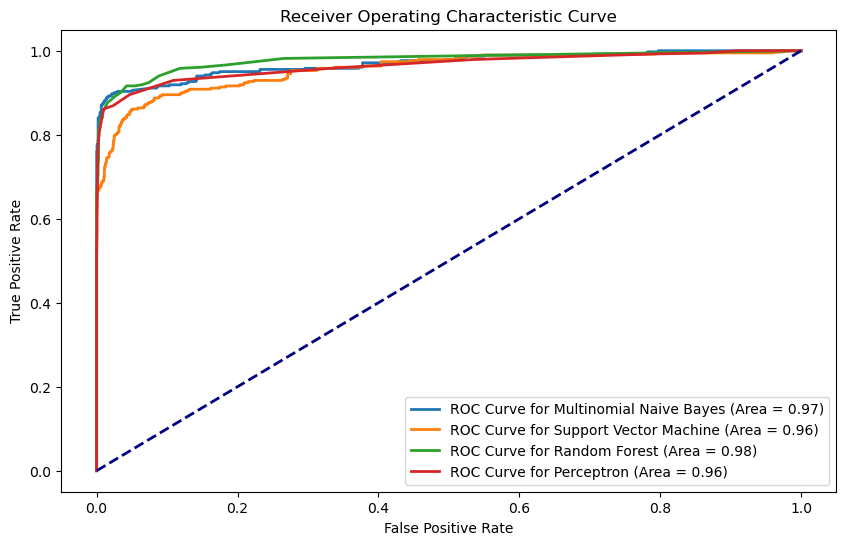

In [41]:
plt.figure(figsize=(10, 6))
for score, classifier in zip(y_score, Classifiers):
    fpr, tpr, _ = roc_curve(Y_test, score)  
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC Curve for %s (Area = %0.2f)' % (classifier, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for an imbalanced dataset (9:1, Ham:Spam) Test Size = 0.75')
plt.legend(loc='lower right')
plt.show()

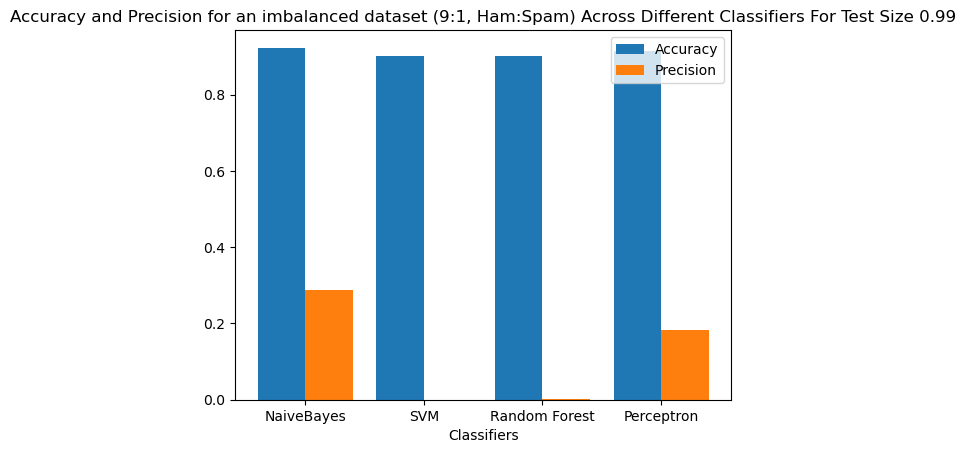

In [44]:
X_train_sms, X_test_sms, Y_train, Y_test = train_test_split(df3['email'], df3['label'], test_size = 0.99, random_state =42)
X_train = count_vector.fit_transform(X_train_sms).toarray()
X_test = count_vector.transform(X_test_sms).toarray()
MNB.fit(X_train,Y_train)
SVM.fit(X_train, Y_train)
RF.fit(X_train, Y_train)
P.fit(X_train,Y_train)

MNBPredict = MNB.predict(X_test)
SVMPredict = SVM.predict(X_test)
RFPredict = RF.predict(X_test) 
PPredict = P.predict(X_test)

y_score = [MNB.predict_proba(X_test)[:,1], SVM.predict_proba(X_test)[:,1], RF.predict_proba(X_test)[:,1], P.decision_function(X_test)]
Classifiers = ['Multinomial Naive Bayes', 'Support Vector Machine', 'Random Forest', 'Perceptron']


NB_accuracy = accuracy_score(MNBPredict, Y_test)
NB_precision = precision_score(MNBPredict, Y_test)
SVM_accuracy= accuracy_score(SVMPredict, Y_test)
SVM_precision = precision_score(SVMPredict, Y_test)
Random_Forest_accuracy =accuracy_score(RFPredict, Y_test)
Random_Forest_precision = precision_score(RFPredict, Y_test)
P_accuracy =accuracy_score(PPredict, Y_test)
P_precision = precision_score(PPredict, Y_test)


X = ['NaiveBayes', 'SVM', 'Random Forest', 'Perceptron']
Yaccuracy = [NB_accuracy, SVM_accuracy, Random_Forest_accuracy, P_accuracy]
Zprecision = [NB_precision, SVM_precision, Random_Forest_precision, P_precision]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Yaccuracy, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, Zprecision, 0.4, label = 'Precision')

  
plt.xticks(X_axis, X)
plt.xlabel("Classifiers")

plt.title("Accuracy and Precision for an imbalanced dataset (9:1, Ham:Spam) Across Different Classifiers For Test Size 0.99")
plt.legend()
plt.show()

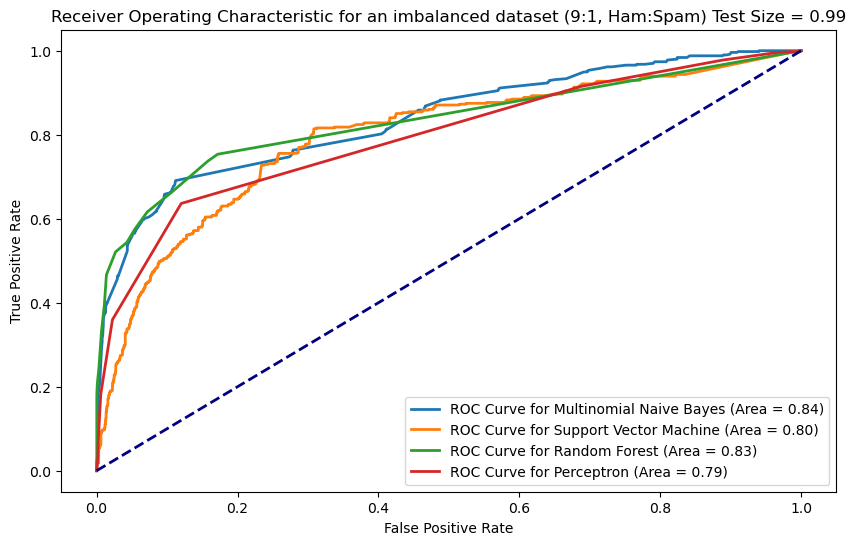

In [45]:
plt.figure(figsize=(10, 6))
for score, classifier in zip(y_score, Classifiers):
    fpr, tpr, _ = roc_curve(Y_test, score)  
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC Curve for %s (Area = %0.2f)' % (classifier, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for an imbalanced dataset (9:1, Ham:Spam) Test Size = 0.99')
plt.legend(loc='lower right')
plt.show()